In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv")

In [3]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.shape

(768, 9)

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Need to correction in pregnacnies
Problem - think practically
Glucose , BloodPressure, Skinthickness , Insulin is 0 that won't we possible

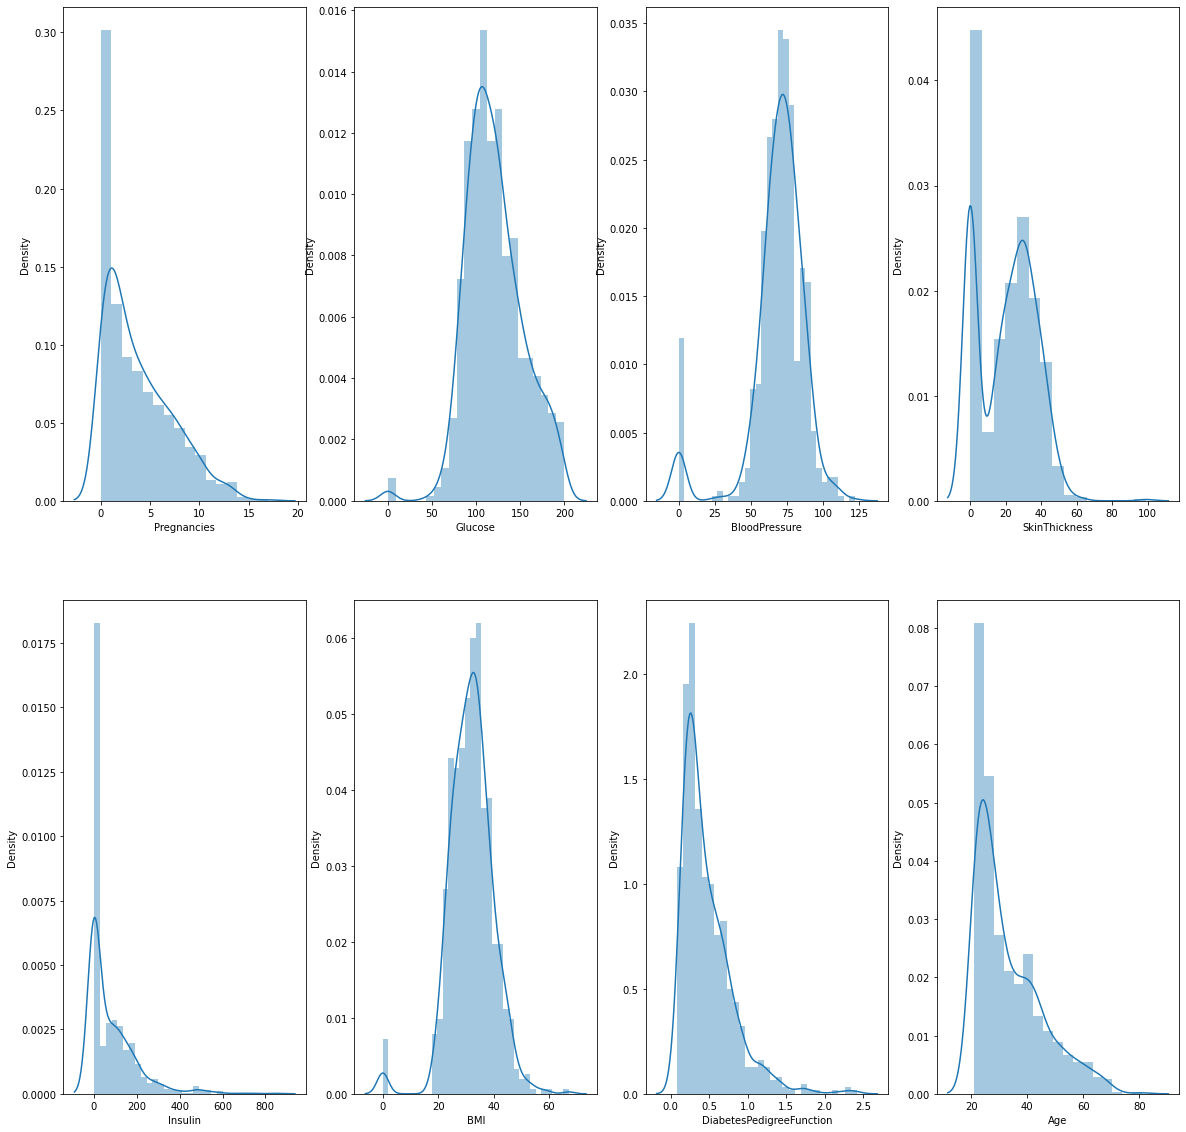

In [9]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=8:
        plt.subplot(2,4,plotno)
        sns.distplot(data[col])
        plt.xlabel(col)  
    plotno+=1
plt.show()
    

In [10]:
#we can see there is some skewness in the data


In [11]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

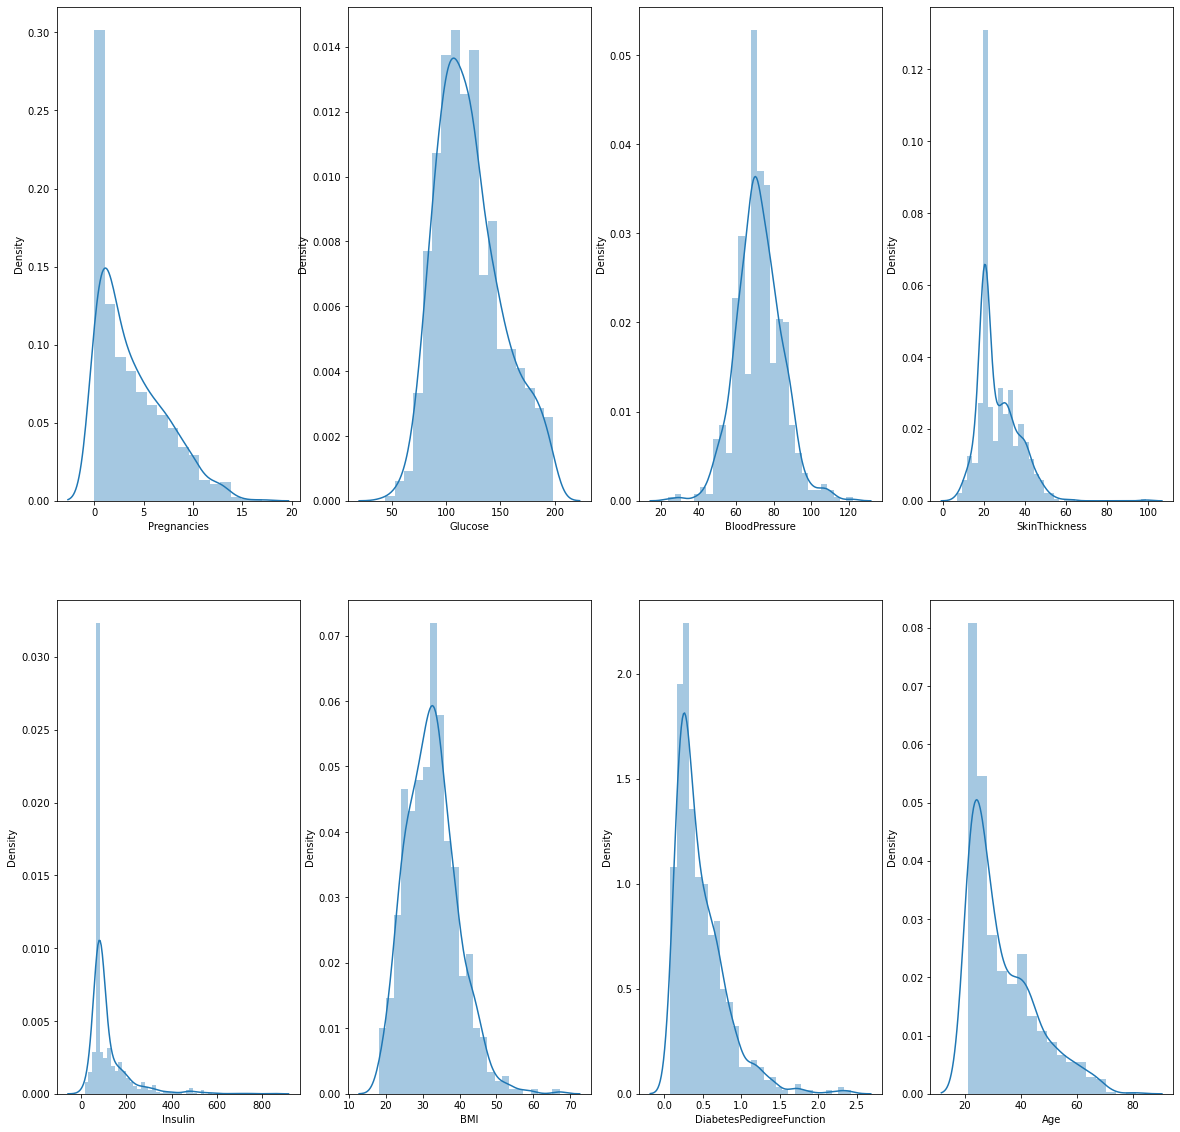

In [12]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=8:
        plt.subplot(2,4,plotno)
        sns.distplot(data[col])
        plt.xlabel(col)  
    plotno+=1
plt.show()
    

In [13]:
df_features=data.drop('Outcome',axis=1)

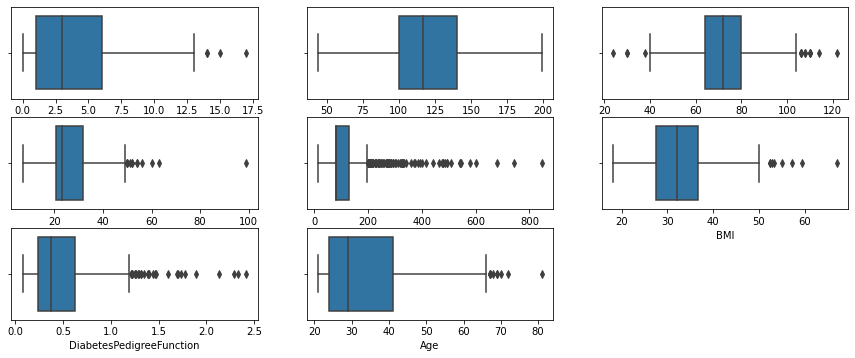

In [14]:
# Visulize the outliers using boxplot
plt.figure(figsize=(15,20))
plotno=1
for col in df_features:
    if plotno<=30:
        plt.subplot(10,3,plotno)
        sns.boxplot(df_features[col])
        plt.xlabel(col,fontsize=10)
    plotno+=1
plt.show()

In [15]:
#find the IQR to identify the outliers

#1st quartile
q1=data.quantile(0.25)
q3=data.quantile(0.75)

#IQR
iqr=q3-q1

Outlier detection formula
higher side ==>q3+(1.5*IQR)
lower side == q1-(1.5*IQR)

In [16]:
#Validating the outlier
preg_high = (q3.Pregnancies+(1.5*iqr.Pregnancies))
preg_high

13.5

In [17]:
index=np.where(data['Pregnancies']>preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [18]:
data=data.drop(data.index[index])
data.shape


(764, 9)

In [19]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
bp_high=(q3.BloodPressure+(1.5*iqr.BloodPressure))
bp_high

104.0

In [21]:
index=np.where(data['BloodPressure']>bp_high)
index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

In [22]:
data=data.drop(data.index[index])
data.shape

(754, 9)

In [23]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [24]:
st_high=(q3.SkinThickness+(1.5*iqr.SkinThickness))
print(st_high)

index=np.where(data['SkinThickness']>st_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

49.1953125


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [25]:
insu_high=(q3.Insulin+(1.5*iqr.Insulin))
print(insu_high)

index=np.where(data['Insulin']>insu_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

198.42578125


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [26]:
BMI_high=(q3.BMI+(1.5*iqr.BMI))
print(BMI_high)

index=np.where(data['BMI']>BMI_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

50.25


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [27]:
dpf_high=(q3.DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction))
print(dpf_high)

index=np.where(data['DiabetesPedigreeFunction']>dpf_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

1.2


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [28]:
age_high=(q3.Age+(1.5*iqr.Age))
print(age_high)

index=np.where(data['Age']>age_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

66.5


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [29]:
bp_low=(q1.BloodPressure-(1.5*iqr.BloodPressure))
print(bp_low)

index=np.where(data['BloodPressure']<bp_low)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

40.0


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


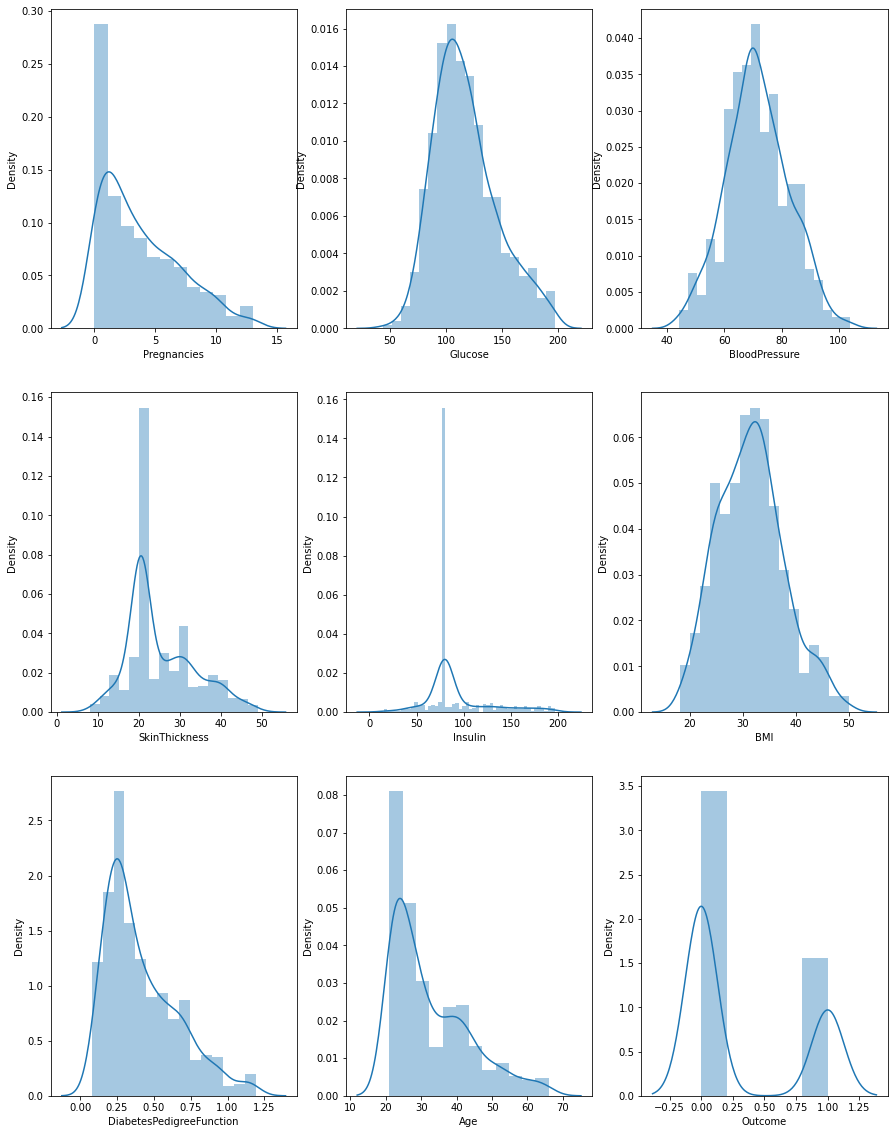

In [30]:
# Visulize the outliers using boxplot
plt.figure(figsize=(15,20))
plotno=1
for col in data:
    if plotno<=9:
        plt.subplot(3,3,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=10)
    plotno+=1
plt.show()

In [31]:
x=data.drop(columns='Outcome')
y=data['Outcome']

#stripplot - we use to find the relaton between dependent& independent variables

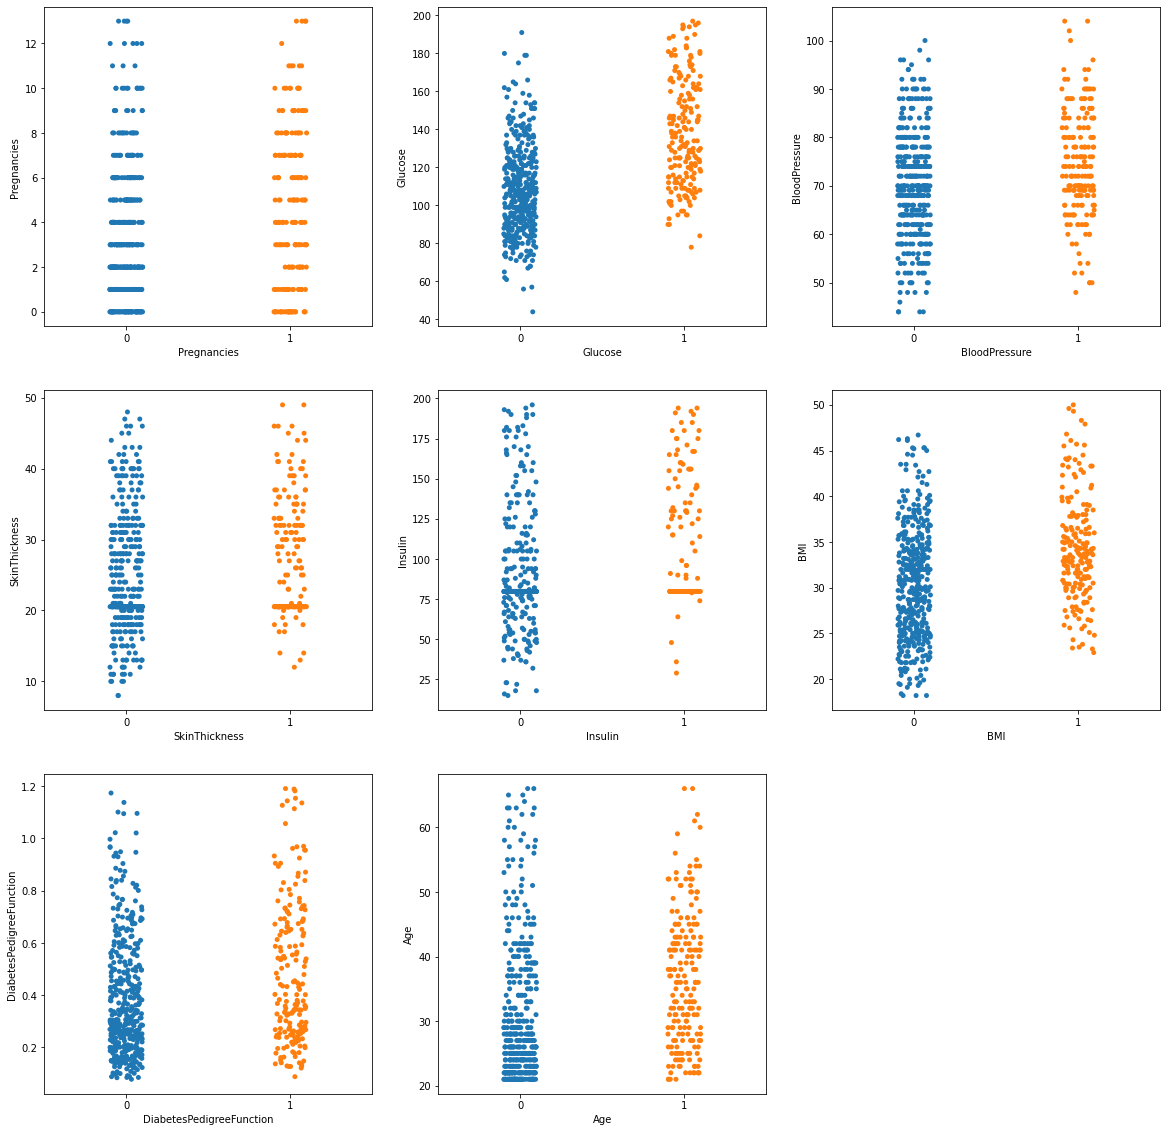

In [32]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in x:
    if plotno<=8:
        ax=plt.subplot(3,3,plotno)
        sns.stripplot(y,x[col])
        plt.xlabel(col)  
    plotno+=1
plt.show()
    

Great !! let's check the multicolinearity in the dependent variables

In [33]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#for the normalization

In [34]:
x_scaled.shape[1]

8

In [36]:
#Finding the multicollinerity
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


vif values less than 5 that's means no multicollinearly


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=355)

In [39]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [40]:
import pickle
#writng diffrent model file to file
with open('modeForPrediction.sav','wb') as f:
    pickle.dump(log_reg,f)
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [41]:
y_pred=log_reg.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7612903225806451

In [46]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[94, 11],
       [26, 24]], dtype=int64)

In [49]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [52]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.7612903225806451

In [54]:
recall=true_positive/(true_positive+false_negative)
recall

0.7833333333333333

In [56]:
precision=true_positive/(true_positive+false_positive)
precision

0.8952380952380953

In [59]:
#F1_score
f1_Score=2*(recall*precision)/(recall+precision)
f1_Score

0.8355555555555555